In [1]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision
import torch
import os
import pandas as pd

# import torch
# from torchvision import datasets
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset
# from torchvision.transforms import ToTensor
# import matplotlib.pyplot as plt
# from torch.utils.data import DataLoader
from torch import nn

In [2]:
ls

1_ANN_CNN.ipynb  img_dir/  labels.csv  test.ipynb  turtle.jpg


tensor([[  0., 255., 255.,  ..., 255., 255., 255.],
        [255.,   0., 255.,  ..., 255., 255., 255.],
        [255., 255.,   0.,  ..., 255., 255., 255.],
        ...,
        [255., 255., 255.,  ...,   0., 255., 255.],
        [255., 255., 255.,  ..., 255.,   0., 255.],
        [255., 255., 255.,  ..., 255., 255.,   0.]])
torch.Size([50, 50])


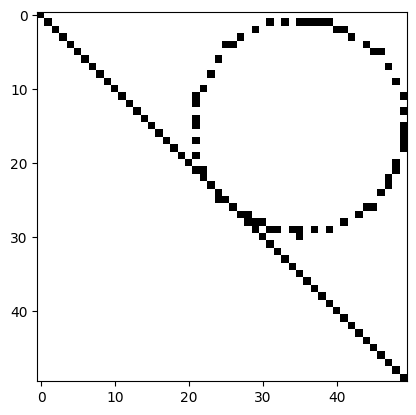

In [3]:
gen_img = torch.ones([50, 50])*255

# Straight Line
for i in range(50):
    for j in range(50):
        if i == j:
            gen_img[i][j] = 0

# Circle
radius = torch.tensor(15)
center = 25

for i in range(90):
    # x = r * cos(θ)
    # y = r * sin(θ)

    tensor_i = torch.tensor(i)
    x = radius * torch.cos(tensor_i)
    y = radius * torch.sin(tensor_i)

    x = x.int()
    y = y.int()

    gen_img[x+radius][y-radius] = 0

print(gen_img)
print(gen_img.shape)
plt.imshow(gen_img, cmap="gray")
plt.show()

In [4]:
img = read_image('./turtle.jpg')

print(f"Image shape before converting to grayscle: {img.shape}")
print(img.type)

# RGB to Grayscale
img = torchvision.transforms.functional.rgb_to_grayscale(img, 1)
print(f"Image shape after converting to grayscle: {img.shape}")


print(f"Image before squeezing: {img}")
img = img.squeeze() # Removes channel - [1, W, H] -> [W, H], all input of size 1 removed
#img = img.float()/255
print(f"Image after squeezing: {img}")
print(f"Image shape after squeezing: {img.shape}")




Image shape before converting to grayscle: torch.Size([3, 50, 50])
<built-in method type of Tensor object at 0x7f8f15937db0>
Image shape after converting to grayscle: torch.Size([1, 50, 50])
Image before squeezing: tensor([[[75, 75, 75,  ..., 72, 69, 69],
         [75, 75, 75,  ..., 71, 68, 68],
         [75, 75, 75,  ..., 69, 69, 69],
         ...,
         [49, 47, 49,  ..., 39, 35, 35],
         [47, 48, 48,  ..., 37, 36, 36],
         [46, 48, 48,  ..., 38, 37, 36]]], dtype=torch.uint8)
Image after squeezing: tensor([[75, 75, 75,  ..., 72, 69, 69],
        [75, 75, 75,  ..., 71, 68, 68],
        [75, 75, 75,  ..., 69, 69, 69],
        ...,
        [49, 47, 49,  ..., 39, 35, 35],
        [47, 48, 48,  ..., 37, 36, 36],
        [46, 48, 48,  ..., 38, 37, 36]], dtype=torch.uint8)
Image shape after squeezing: torch.Size([50, 50])


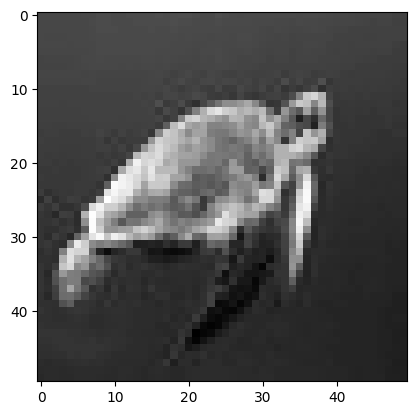

In [5]:
plt.imshow(img, cmap="gray")
plt.show()

## A Simple Neural Network

In [6]:
x1 = torch.tensor([8, 9, 10, 1, 22, 3, 8, 10, 16, 2])
x2 = torch.tensor([19, 5, 7, 2, 77, 33, 2, 55, 1, 6])


y = 2*x2+5*x1 # we need to find this formula

print(y)

tensor([ 78,  55,  64,   9, 264,  81,  44, 160,  82,  22])


In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [16]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [17]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([10, 2]) | Values : tensor([[ 0.5841,  0.4601],
        [-0.2004,  0.2966]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([10]) | Values : tensor([-0.5540,  0.2018], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([5, 10]) | Values : tensor([[-0.0966, -0.1519,  0.0734, -0.2797,  0.1407, -0.1713,  0.2901,  0.2384,
          0.0655,  0.2423],
        [-0.0469, -0.2405,  0.3071,  0.1417,  0.1994,  0.2594, -0.0254, -0.0833,
         -0.3082,  0.3161]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([5]) | Values : tensor([ 0.0082, -0.2954], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([1, 5]) | Values : tensor([[ 0.2679, -0.3161,  0.3490,  0.0137,  0.1748]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.bias | Size: torch.Size([1]) | Values : tensor([0.2264], grad_fn=<SliceBackward0>) 



In [23]:
learning_rate = 1e-3
#batch_size = 2
epochs = 1000

In [24]:
# Initialize the loss function
loss_fn = nn.MSELoss()

# Use Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:

# range_x1 = torch.max(x1) - torch.min(x1)
# normalized_x1 = [(x - torch.min(x1)) / range_x1 for x in x1]     
# print(normalized_x1)

# range_x2 = torch.max(x2) - torch.min(x2)
# normalized_x2 = [(x - torch.min(x2)) / range_x2 for x in x2]     
# print(normalized_x2)

In [26]:


def train_loop():
    size = len(x1)
    # print(size)

    for i in range(size): 
        X = torch.stack([x1[i].float(), x2[i].float()], dim=0)
        # print(X)
        # print(X.shape)
        pred = model(X)
        # print(type(pred))
        # print(type(y[i]))
        loss = loss_fn(pred, y[i].float())
    
        # Backpropagation
        loss.backward() # Find Gradients
        optimizer.step() # Update weights
        optimizer.zero_grad()

    
        loss = loss.item()

        print(f"Row:{i} - Loss: {loss}")
            

In [27]:
for i in range(epochs):

    print(f"Epoch {i+1}")
    train_loop()

Epoch 1
Row:0 - Loss: 3.427577495574951
Row:1 - Loss: 10.253070831298828
Row:2 - Loss: 4.67181396484375
Row:3 - Loss: 23.113357543945312
Row:4 - Loss: 145.07720947265625
Row:5 - Loss: 1.5855680704116821
Row:6 - Loss: 13.21784496307373
Row:7 - Loss: 8.826255798339844
Row:8 - Loss: 8.67697811126709
Row:9 - Loss: 17.557798385620117
Epoch 2
Row:0 - Loss: 0.8714690804481506
Row:1 - Loss: 8.517391204833984
Row:2 - Loss: 5.075967311859131
Row:3 - Loss: 24.00604248046875
Row:4 - Loss: 51.41740798950195
Row:5 - Loss: 8.661118507385254
Row:6 - Loss: 16.60062599182129
Row:7 - Loss: 0.04108637943863869
Row:8 - Loss: 12.747675895690918
Row:9 - Loss: 20.081745147705078
Epoch 3
Row:0 - Loss: 3.4597158432006836
Row:1 - Loss: 10.906291007995605
Row:2 - Loss: 7.201347827911377
Row:3 - Loss: 24.643783569335938
Row:4 - Loss: 19.53301239013672
Row:5 - Loss: 15.195613861083984
Row:6 - Loss: 17.488479614257812
Row:7 - Loss: 1.3542600870132446
Row:8 - Loss: 13.072181701660156
Row:9 - Loss: 20.707735061645508


In [28]:
x1 = torch.tensor(50, dtype=torch.float)
x2 = torch.tensor(10, dtype=torch.float)

print(x1)
print(x2)

X = torch.stack([x1, x2], dim=0)

print(X.shape)

pred = model(X)

print(pred)

tensor(50.)
tensor(10.)
torch.Size([2])
tensor([266.8704], grad_fn=<ViewBackward0>)
